In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb # pip install xgboost
from xgboost import XGBClassifier

from sklearn.svm import SVC
%matplotlib inline

plt.style.use('fast')
sns.set_style('whitegrid')

# What is the type of machine learning problem at hand? (Supervised or Unsupervised)

It is a supervised learning problem and supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not. ... Unsupervised learning models, in contrast, work on their own to discover the inherent structure of unlabeled data and this is a labeled data so we have labeled data so we are using supervised learnig.
What is the category of the machine learning problem at hand? (Classification or Regression?) Why?
This ml problem is regression problem

The main difference between Regression and Classification algorithms that Regression algorithms are used to predict the continuous values such as price, salary, age, etc. and Classification algorithms are used to predict/Classify the discrete values such as Male or Female, True or False, Spam or Not Spam.



In [2]:
data=pd.read_csv(r'C:\Users\Bhaskar\Downloads\data.csv')#Read the csv file
#This dataset represents the characteristics of x1, x2, y

In [3]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
data.shape

(2227, 3)

In [5]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [9]:
data.shape

(2219, 3)

In [10]:
data["y"].value_counts()

0    1238
1     981
Name: y, dtype: int64

In [11]:
x=data.drop("y",axis=1)
y=data.y

<AxesSubplot:>

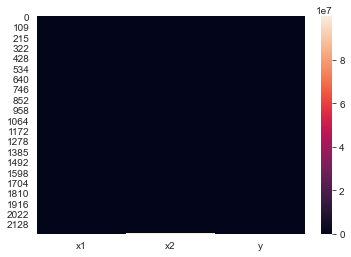

In [12]:
sns.heatmap(data)

In [13]:
corrmat=data.corr()
corrmat

,x1,x2,y
x1,1.000000,0.037288,-0.120871
x2,0.037288,1.000000,-0.026735
y,-0.120871,-0.026735,1.000000


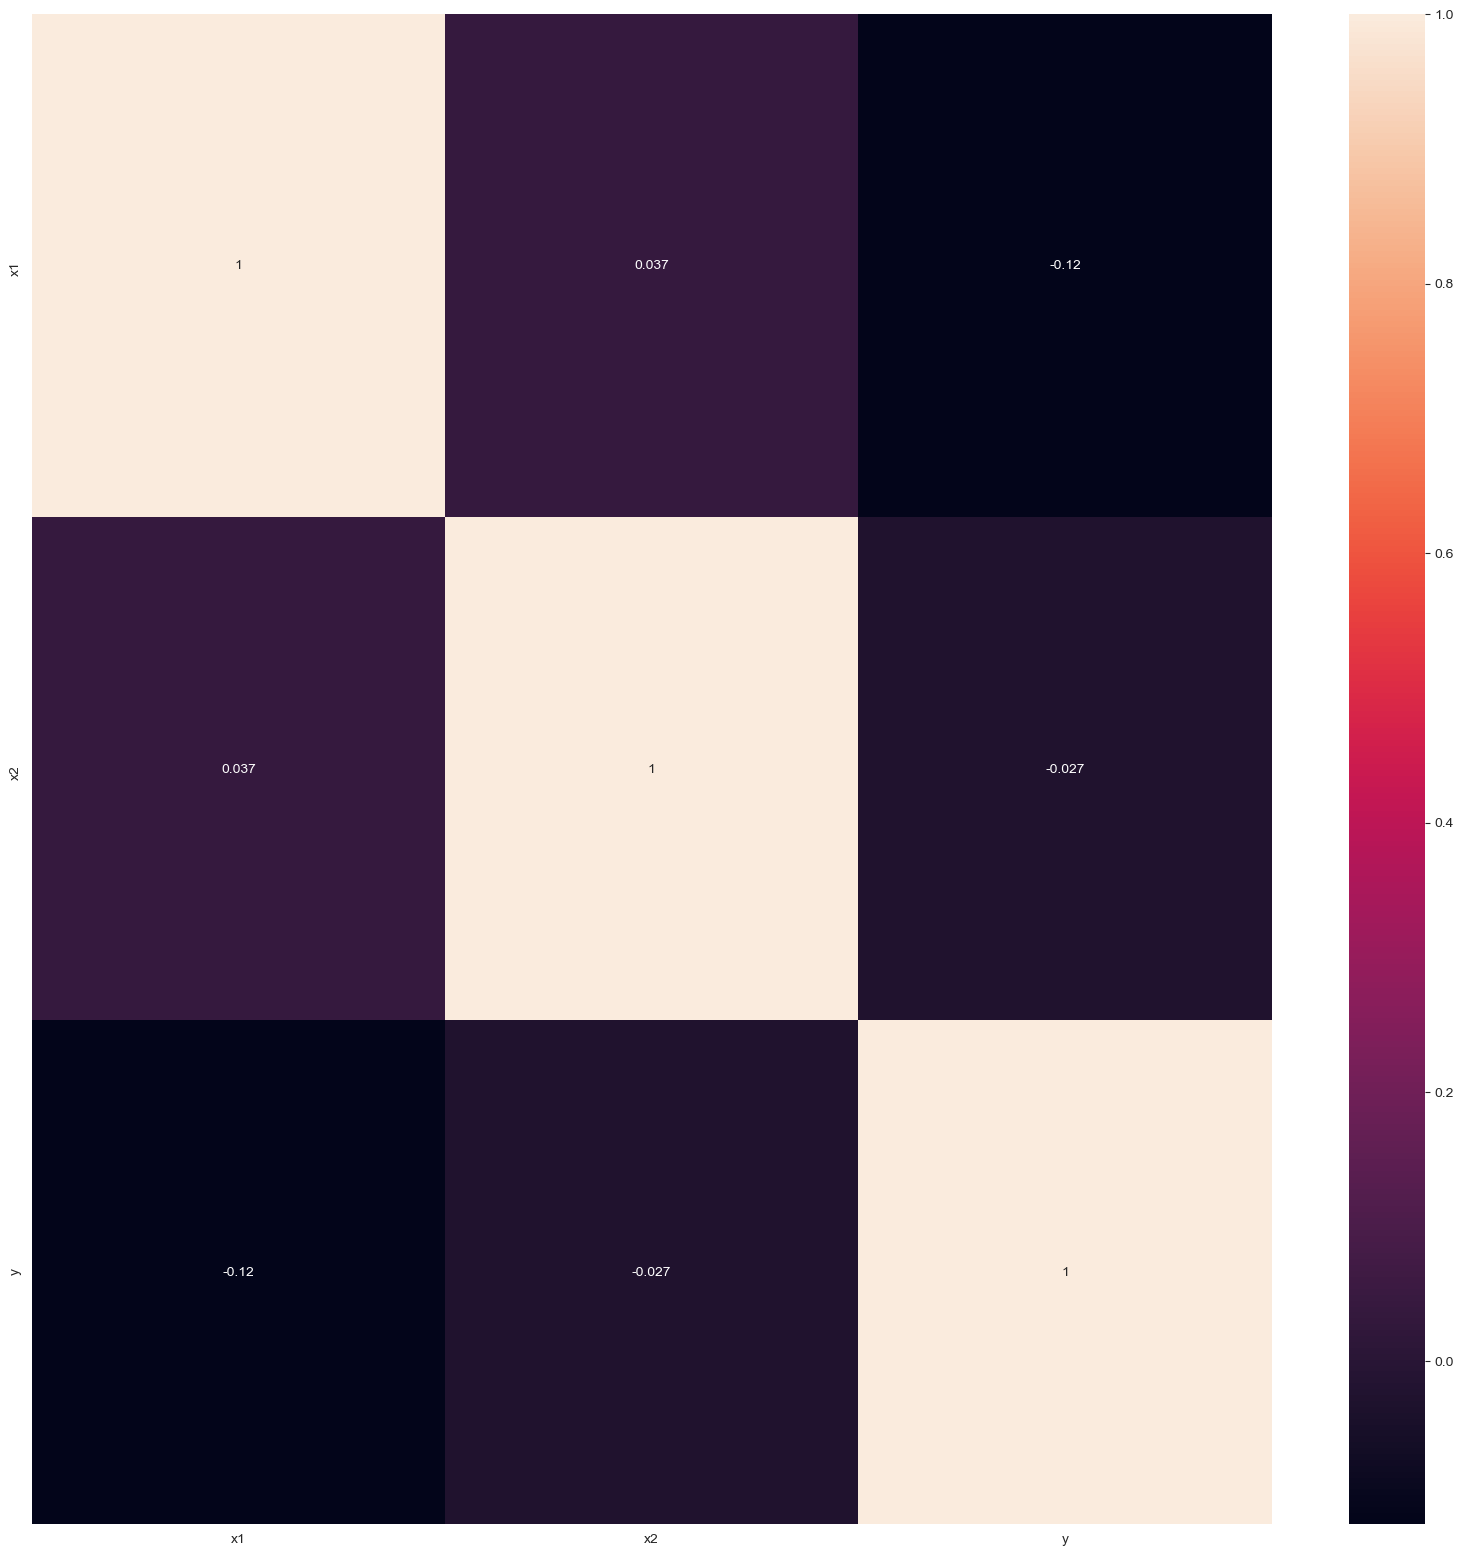

In [14]:
plt.figure(figsize=(20,20), dpi=100)
sns.heatmap(corrmat,annot=True)
plt.show()

A heatmap is a data visualization technique that uses color to show how a value of interest changes depending on the values of two other variables.

For example, you could use a heatmap to understand how air pollution varies according to the time of day across a set of cities.

Another, perhaps more rare case of using heatmaps is to observe human behavior - you can create visualizations of how people use social media, how their answers on surveys changed through time, etc. These techniques can be very powerful for examining patterns in behavior, especially for psychological institutions who commonly send self-assessment surveys to patients.

In [15]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


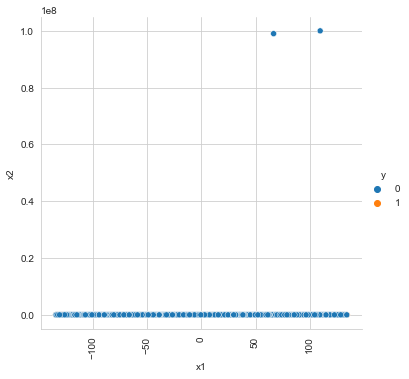

In [16]:
sns.relplot(x='x1',y='x2',hue='y',data=data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='y', ylabel='Density'>

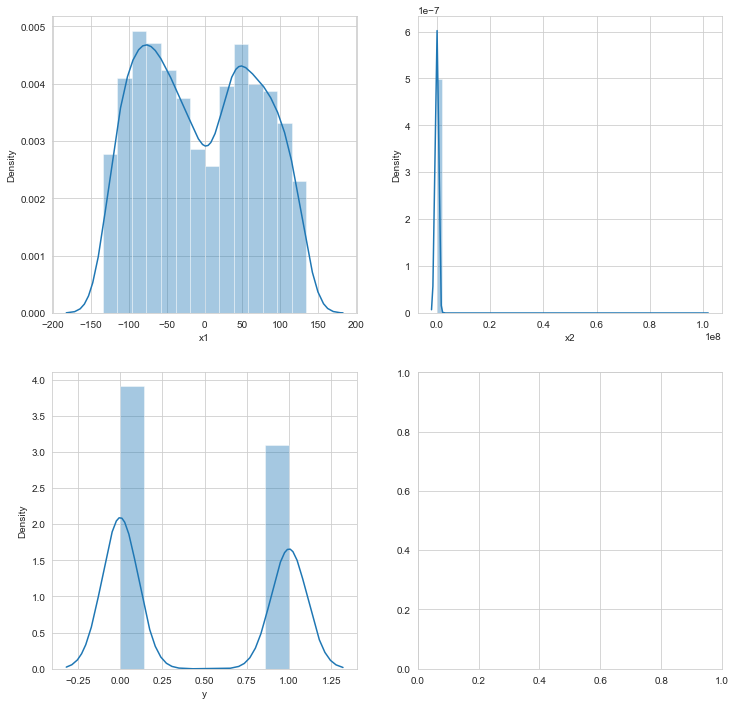

In [17]:
fix, ax=plt.subplots(2,2,figsize=(12,12))
sns.distplot(data['x1'],ax=ax[0,0])
sns.distplot(data['x2'],ax=ax[0,1])
sns.distplot(data['y'],ax=ax[1,0])

 distplot plots a univariate distribution of observations. The distplot () function combines the matplotlib hist function with the seaborn kdeplot () and rugplot () functions. The plot below shows a simple distribution. It creats random values with random.randn (). This will work if you manually define values too.

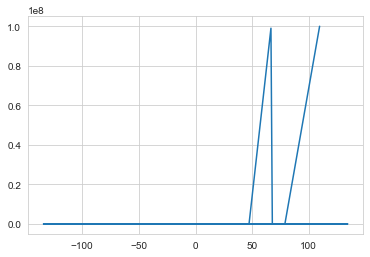

In [18]:
plt.plot(data.x1,data.x2)

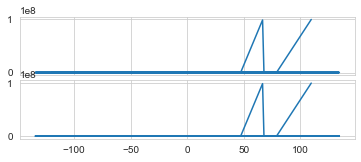

In [19]:
axes1 = plt.subplot2grid (
(7, 1), (0, 0), rowspan = 2, colspan = 1)
axes2 = plt.subplot2grid (
(7, 1), (2, 0), rowspan = 2, colspan = 1)
axes1.plot(data.x1, data.x2)
axes2.plot(data.x1, data.x2)

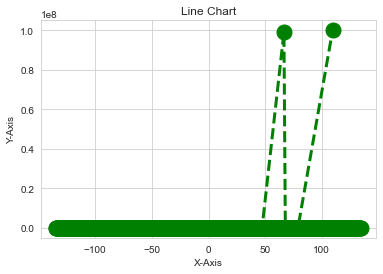

In [20]:
plt.plot(data.x1,data.x2, color='green', linewidth=3, marker='o', 
         markersize=15, linestyle='--')
plt.title("Line Chart")
plt.ylabel('Y-Axis')
plt.xlabel('X-Axis')
plt.show()

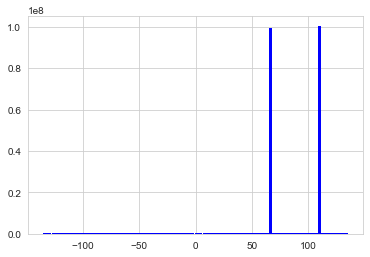

In [21]:
plt.bar(data.x1, data.x2, color='green', edgecolor='blue', 
        linewidth=2) 
plt.show()

In [82]:
def numeric_analysis_hist(feature1):
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(feature1+' Distribution',fontsize = 20) 
    plt.xlabel(feature1 , fontsize = 15)  
    
    dist = sns.distplot(data[feature1],color='g')

# After the normalization of data
Is the data distribution skewed? If highly skewed, do you still find outliers which you did not treat?¶


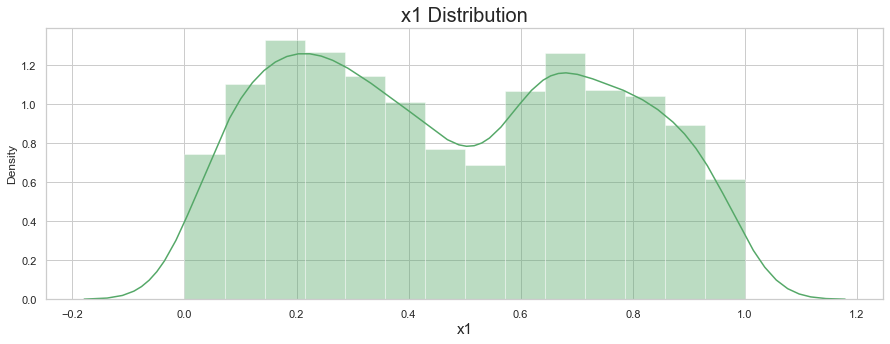

In [83]:
numeric_analysis_hist('x1')

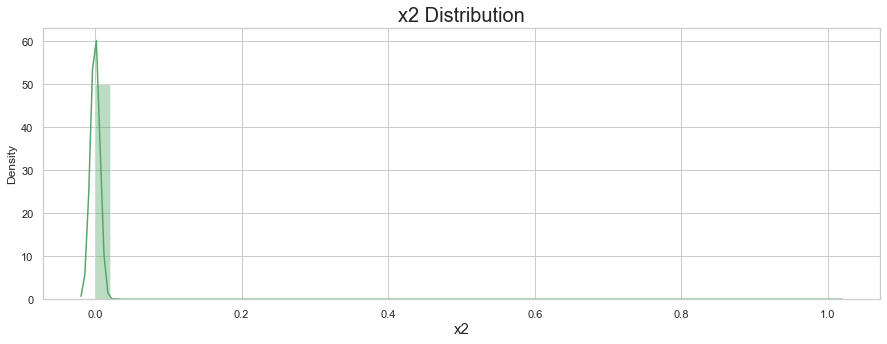

In [84]:
numeric_analysis_hist('x2')

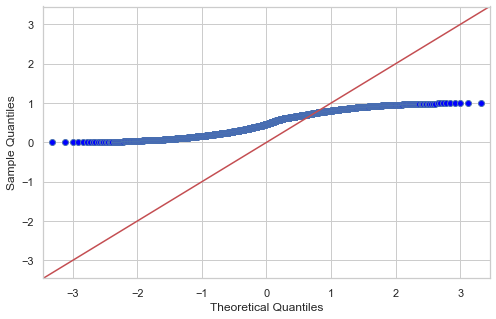

In [87]:
import statsmodels.api as sm
import scipy.stats as norm
import pylab
sm.qqplot(data['x1'],line='45')
pylab.show()

The QQ Plot allows us to see deviation of a normal distribution much better than in a Histogram or box plot.

Now the distribution of data in this column increases a lot than before and the data too picked at the middle

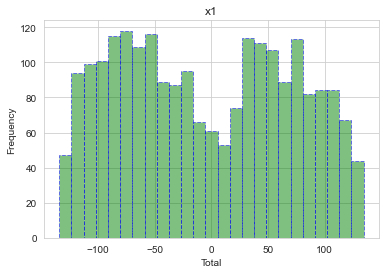

In [22]:
plt.hist(data.x1, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)
plt.title("x1")
plt.ylabel('Frequency')
plt.xlabel('Total')
  
plt.show()

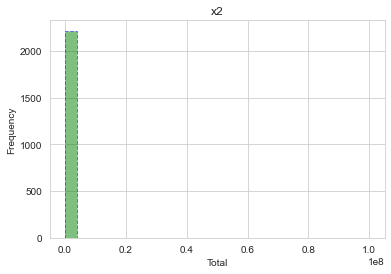

In [23]:
plt.hist(data.x2, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)
plt.title("x2")
plt.ylabel('Frequency')
plt.xlabel('Total')
  
plt.show()

# 3D plot

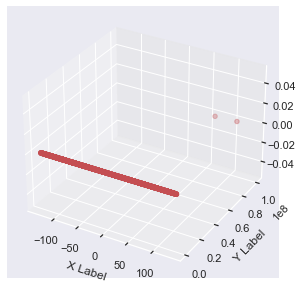

In [24]:
sns.set(rc={'figure.figsize': (8, 5)})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.x1,data.x2, c='r', marker='o')
ax.set_xlabel('X Label'), ax.set_ylabel('Y Label')
plt.show()

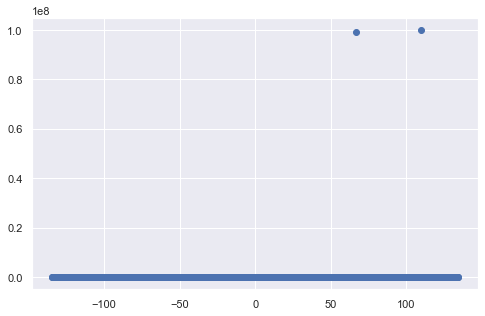

In [25]:
plt.scatter(data.x1,data.x2)
plt.show()

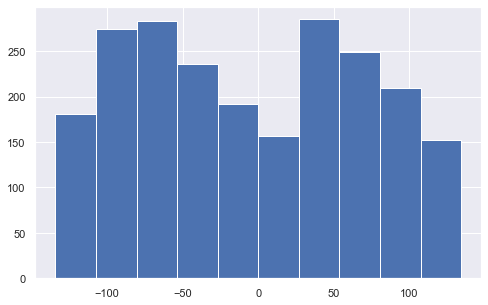

In [26]:
plt.hist(data.x1)
plt.show()

Note: It is crucial to have balanced class distribution, i.e., there should be no significant difference between x1 and x2 classes (commonly x1 classes are more than x2 in the life  field). The models trained on datasets with balanced class distribution tend to be biased and show good performance toward minor knn.

The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve.

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

Feature selection for model training
For good predictions of the  outcome, it is essential to include the good independent variables (features) for fitting the regression model (e.g. variables that are not highly correlated). If you include all features, there are chances that you may not get all significant predictors in the model.

In [29]:
for col in data.columns:
    if col != 'y':
        print(col)
        data[col] = min_max.fit_transform(data[[col]])

x1
x2


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=100)

# Logistic regression is another technique borrowed by machine learning from the field of statistics.
The many names and terms used when describing logistic regression (like log odds and logit).
The representation used for a logistic regression model.
Techniques used to learn the coefficients of a logistic regression model from data.
How to actually make predictions using a learned logistic regression model.
Where to go for more information if you want to dig a little deeper.

In [97]:
log=LogisticRegression(random_state=42)
    
log.fit(x_train,y_train) #fit the model with x_train, y_train

LogisticRegression(random_state=42)

In [98]:
def generate_pred__logistic(modelname,model,x_train,x_test,y_train,y_test):
    log=LogisticRegression(random_state=42)
    
    log.fit(x_train,y_train)
    y_train_pred=log.predict(x_train)

    
    
    print("------Evaluation metrics for training data set--------")
    Accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
    precision_train=metrics.precision_score(y_train,y_train_pred)
    recall_train=metrics.recall_score(y_train,y_train_pred)
    f1_score_train=metrics.f1_score(y_train,y_train_pred)
    roc_auc_train=metrics.roc_auc_score(y_train,y_train_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_train)
    print("Precision score is ",precision_train)
    print("Recall score",recall_train)
    print("f1 SCore score is ",f1_score_train)
    print("Roc_Auc score is",roc_auc_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=log.predict(x_test)
    Accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
    precision_test=metrics.precision_score(y_test,y_test_pred)
    recall_test=metrics.recall_score(y_test,y_test_pred)
    f1_score_test=metrics.f1_score(y_test,y_test_pred)
    roc_auc_test=metrics.roc_auc_score(y_test,y_test_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_test)
    print("Precision score is ",precision_test)
    print("Recall _score is",recall_test)
    print("f1 SCore score is ",f1_score_test)
    print("Roc_Auc score is",roc_auc_test)
    

In [101]:
generate_pred__logistic("Logistic",log,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- Logistic
Accuracy is  0.5864788732394366
Precision score is  0.5578703703703703
Recall score 0.30739795918367346
f1 SCore score is  0.3963815789473684
Roc_Auc score is 0.5573316738400709
-------Evaluation metrics for test dataset--------
modelname- Logistic
Accuracy is  0.5720720720720721
Precision score is  0.5402298850574713
Recall _score is 0.23857868020304568
f1 SCore score is  0.3309859154929577
Roc_Auc score is 0.5383176801824945


In the confusion matrix, diagonal numbers (79 and 50) indicates the correct predictions [true negatives (TN) and true positives (TP)] for the benign (0) and malignant (1) outcomes for test  datasets. The other numbers (7 and 7) indicates incorrect predictions [false positives (FP) and false negatives (FN)]

In [34]:
result_01 = pd.DataFrame({'Algorithm':['LogisticRegression_train'],'Accuracy':0.5864788,'Precision_score':0.557870,'Recall_Score':0.3073979,'F1_score':0.396381,'roc_auc_score':0.5573316},index={'1'})
results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
1,LogisticRegression_train,0.586479,0.55787,0.307398,0.396381,0.557332


In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved.

In [35]:
result_01 = pd.DataFrame({'Algorithm':['LogisticRegression_train'],'Accuracy':0.5720720,'Precision_score':0.5402298,'Recall_Score':0.2385786,'F1_score':0.3309859,'roc_auc_score':0.53831768},index={'2'})
results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
2,LogisticRegression_train,0.572072,0.54023,0.238579,0.330986,0.538318


In [36]:
penalty =['l1', 'l2', 'elasticnet', 'none']

C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

gridcv_log=GridSearchCV(estimator=log,param_grid=hyperparameters,cv=5,verbose=0)

In [37]:
gridcv_log.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [38]:
gridcv_log.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2'}

In [39]:
gridcv_log.best_score_

0.5864788732394366

In [40]:
result_01 = pd.DataFrame({'Algorithm':['LogisticRegression_gridcv_log.best_score_'],'Accuracy':0.5864788,'Precision_score':0.5402298,'Recall_Score':0.2385786,'F1_score':0.3309859,'roc_auc_score':0.53831768},index={'3'})
results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
3,LogisticRegression_gridcv_log.best_score_,0.586479,0.54023,0.238579,0.330986,0.538318


# DecisionTreeClassifier

Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.
Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.
We can represent any boolean function on discrete attributes using the decision tree.

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [42]:

DT=DecisionTreeClassifier(random_state=42)
    
DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

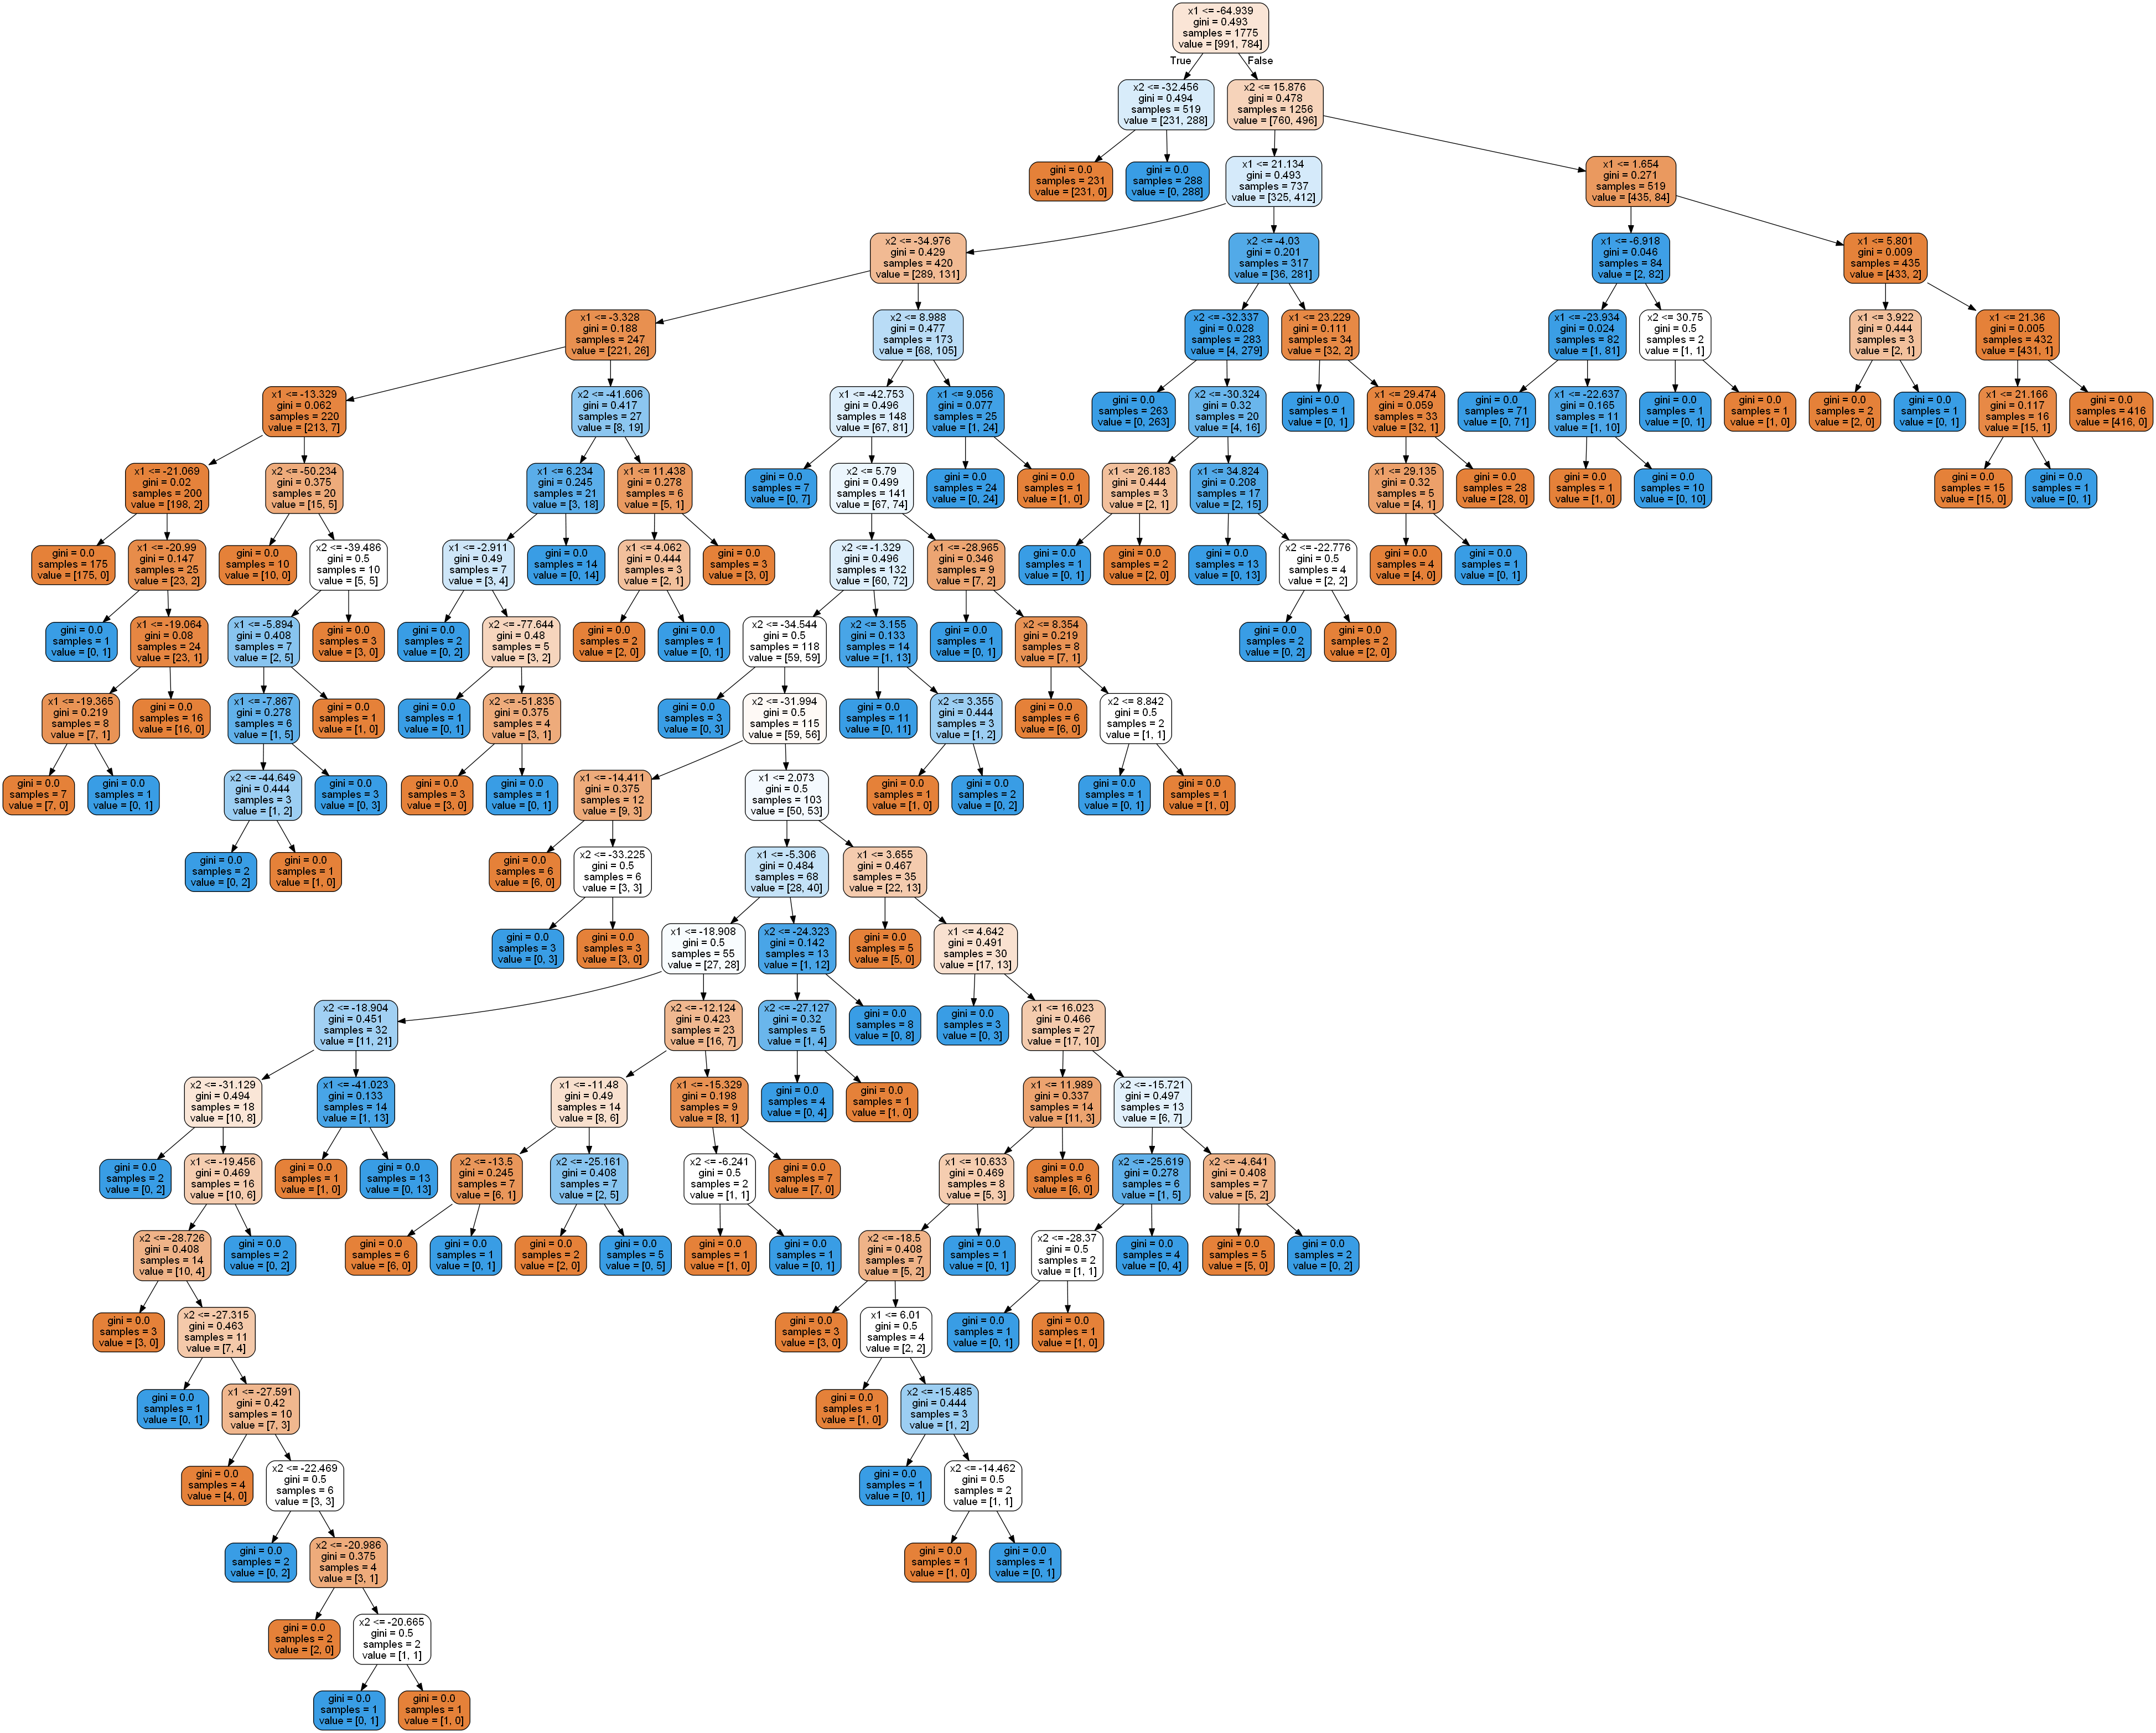

In [43]:
dot_data=StringIO()
export_graphviz(DT,out_file=dot_data,filled=True,rounded=True,
                feature_names=x.columns,
                )
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Gini index is a measure of impurity or purity used while creating a decision tree in the CART (Classification and Regression Tree) algorithm.
ntropy helps us to build an appropriate decision tree for selecting the best splitter. Entropy can be defined as a measure of the purity of the sub split. Entropy always lies between 0 to 1. The entropy of any split can be calculated by this formula.

In [44]:
def generate_pred__DT(modelname,model,x_train,x_test,y_train,y_test):
    DT=DecisionTreeClassifier(random_state=42)
    
    DT.fit(x_train,y_train)
    y_train_pred=DT.predict(x_train)

    
    
    print("------Evaluation metrics for training data set--------")
    Accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
    precision_train=metrics.precision_score(y_train,y_train_pred)
    recall_train=metrics.recall_score(y_train,y_train_pred)
    f1_score_train=metrics.f1_score(y_train,y_train_pred)
    roc_auc_train=metrics.roc_auc_score(y_train,y_train_pred)
    recall=metrics.recall_score(y_train,y_train_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_train)
    print("Precision score is ",precision_train)
    print("f1 SCore score is ",f1_score_train)
    print("Roc_Auc score is",roc_auc_train)
    print("recall score is",recall)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=DT.predict(x_test)
    Accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
    precision_test=metrics.precision_score(y_test,y_test_pred)
    recall_test=metrics.recall_score(y_test,y_test_pred)
    f1_score_test=metrics.f1_score(y_test,y_test_pred)
    roc_auc_test=metrics.roc_auc_score(y_test,y_test_pred)
    recall=metrics.recall_score(y_test,y_test_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_test)
    print("Precision score is ",precision_test)
    print("f1 SCore score is ",f1_score_test)
    print("Roc_Auc score is",roc_auc_test)
    print("recall score is",recall)
    

In [45]:
generate_pred__DT("Decison Tree",DT,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- Decison Tree
Accuracy is  1.0
Precision score is  1.0
f1 SCore score is  1.0
Roc_Auc score is 1.0
recall score is 1.0
-------Evaluation metrics for test dataset--------
modelname- Decison Tree
Accuracy is  0.9324324324324325
Precision score is  0.9154228855721394
f1 SCore score is  0.9246231155778896
Roc_Auc score is 0.9325921206765451
recall score is 0.934010152284264


# observation
In ROC, we can summarize the model predictability based on the area under curve (AUC). AUC range from 0.5 to 1 and a model with higher AUC has higher predictability. AUC refers to the probability that randomly chosen benign patients will have high chances of classification as benign than randomly chosen malignant patients.
The fitted model has AUC 0.9324324324324325 suggesting better predictability in classification for dataset. The points lying above the chance level and close to grey line (perfect performance) represents a model with higher predictability.
The accuracy of the fitted model is 0.9324324324324325. Even though accuracy is a measure of model performance, it is not alone enough. The AUC outperforms accuracy for model predictability. Two models can have the same accuracy but can differ in AUC. The models which are evaluated solely on accuracy may lead to misleading classification.

In [46]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [47]:
result_01 = pd.DataFrame({'Algorithm':['DecisionTreeClassifier_para_Train'],'Accuracy':  0.9224324,'Precision_score':0.91541128,'Recall_Score':0.93401,'F1_score': 0.92462,'roc_auc_score':0.9325921},index={'4'})
DecisionTree_para_Train = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
DecisionTree_para_Train

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
4,DecisionTreeClassifier_para_Train,0.922432,0.915411,0.93401,0.92462,0.932592


In [48]:
result_01 = pd.DataFrame({'Algorithm':['DecisionTreeClassifier_para_Train'],'Accuracy':  0.932432432,'Precision_score':0.91542288,'Recall_Score':0.93401,'F1_score': 0.934010152,'roc_auc_score':0.9325921},index={'5'})
DecisionTree_para_Train = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
DecisionTree_para_Train

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
5,DecisionTreeClassifier_para_Train,0.932432,0.915423,0.93401,0.93401,0.932592


In [49]:
n_estimators = [100,150,200]
max_features = ['auto', 'sqrt']
criterion = ["gini", "entropy"]
max_depth = [2,5,10,15]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]
hyper_grid_DT = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [50]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
DT=DecisionTreeClassifier(random_state=42)
DT_random = RandomizedSearchCV(estimator =DT, param_distributions =params, n_iter = 55, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [52]:
DT_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=55, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   random_state=42, verbose=2)

In [53]:
DT_random.best_score_

0.9419718309859155

In [54]:
result_01 = pd.DataFrame({'Algorithm':['DecisionTreeClassifier_best_score_'],'Accuracy':  0.941971830,'Precision_score':0.91542288,'Recall_Score':0.93401,'F1_score': 0.934010152,'roc_auc_score':0.9325921},index={'6'})
DecisionTree_para_Train = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
DecisionTree_para_Train

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
6,DecisionTreeClassifier_best_score_,0.941972,0.915423,0.93401,0.93401,0.932592


here Accuracy 	Precision_score 	Recall_Score 	F1_score 	roc_auc_score are performing all good

# observation
In ROC, we can summarize the model predictability based on the area under curve (AUC). AUC range from 0.5 to 1 and a model with higher AUC has higher predictability. AUC refers to the probability that randomly chosen benign patients will have high chances of classification as benign than randomly chosen malignant patients.
The fitted model has AUC 0.941972better predictability in classification for dataset. The points lying above the chance level and close to grey line (perfect performance) represents a model with higher predictability.
The accuracy of the fitted model is 0.9419718309859155. Even though accuracy is a measure of model performance. The AUC outperforms accuracy for model predictability. Two models can have the same accuracy but can differ in AUC. The models which are evaluated solely on accuracy may lead to misleading classification.

# SVC

In [55]:
from sklearn.svm import SVC
svc=SVC(C=1.0,kernel='rbf',degree=3,gamma='scale',coef0=0.0,shrinking=True,probability=False,tol=0.001,cache_size=200,class_weight=None,verbose=5)
svc.fit(x_train,y_train)

[LibSVM]

SVC(verbose=5)

In [56]:
def generate_pred__SV_rbf(modelname,model,x_train,x_test,y_train,y_test):
    svc=SVC(random_state=42)
    
    svc.fit(x_train,y_train)
    y_train_pred=svc.predict(x_train)

    
    
    print("------Evaluation metrics for training data set--------")
    Accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
    precision_train=metrics.precision_score(y_train,y_train_pred)
    recall_train=metrics.recall_score(y_train,y_train_pred)
    f1_score_train=metrics.f1_score(y_train,y_train_pred)
    roc_auc_train=metrics.roc_auc_score(y_train,y_train_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_train)
    print("Precision score is ",precision_train)
    print("f1 SCore score is ",f1_score_train)
    print("Roc_Auc score is",roc_auc_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=svc.predict(x_test)
    Accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
    precision_test=metrics.precision_score(y_test,y_test_pred)
    recall_test=metrics.recall_score(y_test,y_test_pred)
    f1_score_test=metrics.f1_score(y_test,y_test_pred)
    roc_auc_test=metrics.roc_auc_score(y_test,y_test_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_test)
    print("Precision score is ",precision_test)
    print("f1 SCore score is ",f1_score_test)
    print("Roc_Auc score is",roc_auc_test)
    

In [57]:
generate_pred__SV_rbf("SVC",svc,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- SVC
Accuracy is  0.5583098591549296
Precision score is  0.0
f1 SCore score is  0.0
Roc_Auc score is 0.5
-------Evaluation metrics for test dataset--------
modelname- SVC
Accuracy is  0.5563063063063063
Precision score is  0.0
f1 SCore score is  0.0
Roc_Auc score is 0.5


In [58]:
result_01 = pd.DataFrame({'Algorithm':['SVM_train'],'Accuracy': 0.558309,'Precision_score':0,'Recall_Score':0,'F1_score': 0,'roc_auc_score':0.5},index={'7'})
svm_train = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
svm_train

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
7,SVM_train,0.558309,0,0,0,0.5


In [59]:
result_01 = pd.DataFrame({'Algorithm':['SVM_test'],'Accuracy': 0.5563063,'Precision_score':0,'Recall_Score':0,'F1_score': 0,'roc_auc_score':0.5},index={'8'})
svm_train = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
svm_train

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
8,SVM_test,0.556306,0,0,0,0.5


In [60]:
params = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma':['scale', 'auto'],
    'criterion': ["gini", "entropy"],
    
}

In [61]:
from sklearn.svm import SVC
svc=SVC(C=1.0, kernel='rbf',random_state=42,gamma='scale')
svc.fit(x_train,y_train)

SVC(random_state=42)

In [62]:
def generate_pred__SV_lin(modelname,model,x_train,x_test,y_train,y_test):
    svc=SVC(random_state=42)
    
    svc.fit(x_train,y_train)
    y_train_pred=svc.predict(x_train)

    
    
    print("------Evaluation metrics for training data set--------")
    Accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
    precision_train=metrics.precision_score(y_train,y_train_pred)
    recall_train=metrics.recall_score(y_train,y_train_pred)
    f1_score_train=metrics.f1_score(y_train,y_train_pred)
    roc_auc_train=metrics.roc_auc_score(y_train,y_train_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_train)
    print("Precision score is ",precision_train)
    print("f1 SCore score is ",f1_score_train)
    print("Roc_Auc score is",roc_auc_train)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=svc.predict(x_test)
    Accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
    precision_test=metrics.precision_score(y_test,y_test_pred)
    recall_test=metrics.recall_score(y_test,y_test_pred)
    f1_score_test=metrics.f1_score(y_test,y_test_pred)
    roc_auc_test=metrics.roc_auc_score(y_test,y_test_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_test)
    print("Precision score is ",precision_test)
    print("f1 SCore score is ",f1_score_test)
    print("Roc_Auc score is",roc_auc_test)
    

In [63]:
generate_pred__SV_lin("SVC",svc,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- SVC
Accuracy is  0.5583098591549296
Precision score is  0.0
f1 SCore score is  0.0
Roc_Auc score is 0.5
-------Evaluation metrics for test dataset--------
modelname- SVC
Accuracy is  0.5563063063063063
Precision score is  0.0
f1 SCore score is  0.0
Roc_Auc score is 0.5


In [64]:
result_01 = pd.DataFrame({'Algorithm':['SVM_para'],'Accuracy': 0.5583063,'Precision_score':0,'Recall_Score':0,'F1_score': 0,'roc_auc_score':0.5},index={'9'})
svm_train = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
svm_train

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
9,SVM_para,0.558306,0,0,0,0.5


# here we are getting very less accuracy 0.558306

observation

In ROC, we can summarize the model predictability based on the area under curve (AUC). AUC range from 0.5 to 1 and a model with higher AUC has higher predictability. AUC refers to the probability that randomly chosen benign patients will have high chances of classification as benign than randomly chosen malignant patients. The fitted model has AUC 0.558306 suggesting better predictability in classification for dataset. The points lying above the chance level and close to grey line (perfect performance) represents a model with higher predictability. The accuracy of the fitted model is 0.558306. Even though accuracy is a measure of model performance. The AUC outperforms accuracy for model predictability. Two models can have the same accuracy but can differ in AUC. The models which are evaluated solely on accuracy may lead to misleading classification.


# KNeighborsClassifier

# K Nearest Neighbor is one of the fundamental algorithms in machine learning. Machine learning models use a set of input values to predict output values. KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified.


In [65]:
knn=KNeighborsClassifier()  
knn.fit(x_train,y_train)

KNeighborsClassifier()

If K = 5, then in this case query instance xq will be classified as
negative since three of its nearest neighbors are classified as
negative

In [66]:
def generate_pred__KNN(modelname,model,x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    
    knn.fit(x_train,y_train)
    y_train_pred=knn.predict(x_train)

    
    
    print("------Evaluation metrics for training data set--------")
    Accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
    precision_train=metrics.precision_score(y_train,y_train_pred)
    recall_train=metrics.recall_score(y_train,y_train_pred)
    f1_score_train=metrics.f1_score(y_train,y_train_pred)
    roc_auc_train=metrics.roc_auc_score(y_train,y_train_pred)
    recall=metrics.recall_score(y_train,y_train_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_train)
    print("Precision score is ",precision_train)
    print("f1 SCore score is ",f1_score_train)
    print("Roc_Auc score is",roc_auc_train)
    print("Recall score is",recall)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=knn.predict(x_test)
    Accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
    precision_test=metrics.precision_score(y_test,y_test_pred)
    recall_test=metrics.recall_score(y_test,y_test_pred)
    f1_score_test=metrics.f1_score(y_test,y_test_pred)
    roc_auc_test=metrics.roc_auc_score(y_test,y_test_pred)
    recall=metrics.recall_score(y_test,y_test_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_test)
    print("Precision score is ",precision_test)
    print("f1 SCore score is ",f1_score_test)
    print("Roc_Auc score is",roc_auc_test)
    print("Recall score is",recall)

Standard Euclidean Distance<br>
 d(xi
,xJ
) = √(For all attributes a ∑ (xi,a – xJ,a)
2

Accuracy = (# of correctly classified examples / # of training
examples) X 100

In [67]:
generate_pred__KNN("KNN",knn,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- KNN
Accuracy is  0.9673239436619718
Precision score is  0.9641943734015346
f1 SCore score is  0.962962962962963
Roc_Auc score is 0.9667402026400873
Recall score is 0.9617346938775511
-------Evaluation metrics for test dataset--------
modelname- KNN
Accuracy is  0.9572072072072072
Precision score is  0.9540816326530612
f1 SCore score is  0.9516539440203563
Roc_Auc score is 0.9564006658583202
Recall score is 0.949238578680203


In [68]:
result_01 = pd.DataFrame({'Algorithm':['KNeighborsClassifier_Train'],'Accuracy':0.72,'Precision_score':0.9641943,'Recall_Score':0.96173469,'F1_score':0.96296296,'roc_auc_score':0.9667402},index={'10'})
Train_results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
Train_results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
10,KNeighborsClassifier_Train,0.72,0.964194,0.961735,0.962963,0.96674


In [69]:
result_01 = pd.DataFrame({'Algorithm':['KNeighborsClassifier_Test'],'Accuracy':0.95720720,'Precision_score':0.954081,'Recall_Score': 0.949238,'F1_score':0.9516539,'roc_auc_score':0.9564006},index={'11'})
Train_results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
Train_results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
11,KNeighborsClassifier_Test,0.957207,0.954081,0.949238,0.951654,0.956401


In [70]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [71]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [72]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.949 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.935 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.952 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.961 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.946 total 

[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.949 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.946 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.930 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.955 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.955 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.946 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.944 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.932 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n

[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.944 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.932 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.949 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.930 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size

[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=10;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.941 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.932 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=11;, score=0.952 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.952 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.927 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.952 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.927 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12;, score=0.949 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.969 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.952 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.930 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=3;, score=0.949 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=3;,

[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.935 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=3;, score=0.952 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.961 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7;, score=0.958 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7;, score=0.949 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7;, score=0.

[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.949 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.946 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.930 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=7;, score=0.955 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.955 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.946 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.944 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.932 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=9;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=10;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=10;, score=

[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.949 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.930 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.941 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.932 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=0.952 total ti

[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.963 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.952 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.927 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=12;, score=0.949 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.969 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.952 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.952 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.930 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=13;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=0.949 total ti

[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.935 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.949 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=0.952 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.961 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.938 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.958 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=7;, score=0.949 total time=   0.0s

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [73]:
gridsearch.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)>

In [74]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [75]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =12)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [76]:
def generate_pred__KNN(modelname,model,x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    
    knn.fit(x_train,y_train)
    y_train_pred=knn.predict(x_train)

    
    
    print("------Evaluation metrics for training data set--------")
    Accuracy_train=metrics.accuracy_score(y_train,y_train_pred)
    precision_train=metrics.precision_score(y_train,y_train_pred)
    recall_train=metrics.recall_score(y_train,y_train_pred)
    f1_score_train=metrics.f1_score(y_train,y_train_pred)
    roc_auc_train=metrics.roc_auc_score(y_train,y_train_pred)
    recall=metrics.recall_score(y_train,y_train_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_train)
    print("Precision score is ",precision_train)
    print("f1 SCore score is ",f1_score_train)
    print("Roc_Auc score is",roc_auc_train)
    print("Recall score is",recall)
    
    print("-------Evaluation metrics for test dataset--------")
    y_test_pred=knn.predict(x_test)
    Accuracy_test=metrics.accuracy_score(y_test,y_test_pred)
    precision_test=metrics.precision_score(y_test,y_test_pred)
    recall_test=metrics.recall_score(y_test,y_test_pred)
    f1_score_test=metrics.f1_score(y_test,y_test_pred)
    roc_auc_test=metrics.roc_auc_score(y_test,y_test_pred)
    recall=metrics.recall_score(y_test,y_test_pred)
    print("modelname-",modelname)
    print("Accuracy is ",Accuracy_test)
    print("Precision score is ",precision_test)
    print("f1 SCore score is ",f1_score_test)
    print("Roc_Auc score is",roc_auc_test)
    print("Recall score is",recall)

In [77]:
generate_pred__KNN("KNN",knn,x_train,x_test,y_train,y_test)

------Evaluation metrics for training data set--------
modelname- KNN
Accuracy is  0.9673239436619718
Precision score is  0.9641943734015346
f1 SCore score is  0.962962962962963
Roc_Auc score is 0.9667402026400873
Recall score is 0.9617346938775511
-------Evaluation metrics for test dataset--------
modelname- KNN
Accuracy is  0.9572072072072072
Precision score is  0.9540816326530612
f1 SCore score is  0.9516539440203563
Roc_Auc score is 0.9564006658583202
Recall score is 0.949238578680203


In [78]:
result_01 = pd.DataFrame({'Algorithm':['KNeighborsClassifier_Train_para'],'Accuracy':0.72,'Precision_score':0.9641943,'Recall_Score':0.96173469,'F1_score':0.96296296,'roc_auc_score':0.9667402},index={'12'})
Train_results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
Train_results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
12,KNeighborsClassifier_Train_para,0.72,0.964194,0.961735,0.962963,0.96674


In [103]:
result_01 = pd.DataFrame({'Algorithm':['KNeighborsClassifier_Test_para'],'Accuracy':0.95720720,'Precision_score':0.954081,'Recall_Score': 0.949238,'F1_score':0.9516539,'roc_auc_score':0.9564006},index={'12'})
Train_results = result_01[['Algorithm','Accuracy','Precision_score','Recall_Score','F1_score','roc_auc_score']]
Train_results

,Algorithm,Accuracy,Precision_score,Recall_Score,F1_score,roc_auc_score
12,KNeighborsClassifier_Test_para,0.957207,0.954081,0.949238,0.951654,0.956401


# Knn  Algorithm performing very in this data set.
observation

In ROC, we can summarize the model predictability based on the area under curve (AUC). AUC range from 0.5 to 1 and a model with higher AUC has higher predictability. AUC refers to the probability that randomly chosen benign patients will have high chances of classification as benign than randomly chosen malignant patients. The fitted model has AUC 0.96674  better predictability in classification for dataset. The points lying above the chance level and close to grey line (perfect performance) represents a model with higher predictability. The accuracy of the fitted model is0.957207. Even though accuracy is a measure of model performance. The AUC outperforms accuracy for model predictability. Two models can have the same accuracy but can differ in AUC. The models which are evaluated solely on accuracy may lead to misleading classification.



This is how KNN works
Surprisingly enough, the KNN algorithm is quite accessible and easy to understand. For an observation that’s not in the dataset, the algorithm will simply look for the K number of instances defined as similar based on the closest perimeter to that observation. Any data point falls under a specific group if it’s close enough to it.
More formally given a +ve integer k an unseen observation x and a. Similarity metric d, kNN Classifier performs the following two steps.
It runs through the whole dataset computing d between x and each training observation. We’ll call k points in the training dataset to x the set A. Note that k is usually odd to prevent a situation.
It then estimates the conditional probability for each class, which is the fraction of points in A with that given class label.
‘’kNN searches the memorized training observation for the instances that most closely resemble the new instance & assign to it their most common class’’
An alternate way of understanding kNN is by thinking about it as calculating a decision boundary (i.e boundaries for more than two classes) which is then used to classify new points.
Dataset:
This dataset is about Iris was taken from the UCI Repository. In this dataset, we have 3 attributes which have sepal length, sepal width, and species. Species have a target attribute. In target attribute, we have three species (Setosa, Virginia, and Versicolor) and our target finds the nearest species which belong from three species using the k-Nearest Neighbors.